In this project, we work with the "Students Performance in Exams" dataset.
Our goal is to predict Math Scores based on other student attributes using machine learning models.


We perform Exploratory Data Analysis (EDA), Data Preprocessing, Model Training, Model Evaluation, and Visualization of Results.

## 1. Import Libraries

We import the required libraries:

- Pandas and numpy for data manipulation.

- Matplotlib and seaborn for data visualization.

- Scikit-learn modules for building and evaluating machine learning models.

In [24]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

## 2. Load Dataset

We load the dataset using pandas read_csv() function.
This dataset includes features such as:

- Gender

- Race/Ethnicity

- Parental Level of Education

- Lunch Status

- Test Preparation Course

- Math, Reading, and Writing Scores

In [25]:
# -----------------------------
# 2. Load Dataset
# -----------------------------
df = pd.read_csv('StudentsPerformance.csv')

## 3. Initial Exploration

We conduct an initial examination of the dataset:

- View the number of rows and columns.

- Confirm data types.

- Check for any missing values.

Result:

- The dataset has 1000 rows and 8 columns.

- No missing values detected.

In [26]:
# -----------------------------
# 3. Initial Exploration
# -----------------------------
print(f"Dataset Shape: {df.shape}")
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (1000, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score 

## 4. Create Average Score Column

We create a new feature called 'average score', which is the mean of math score, reading score, and writing score.


This feature can help us analyze overall student performance later if needed.

In [27]:
# -----------------------------
# 4. Create Average Score Column (Optional Bonus)
# -----------------------------
df['average score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

## 5. Exploratory Data Analysis (EDA)

**5.1 Categorical Feature Distributions**

We visualize distributions of categorical features (gender, race/ethnicity, parental education, lunch, and test prep status) using count plots.

Insights:

- Some racial groups are represented more than others.

- More students did not complete test preparation.

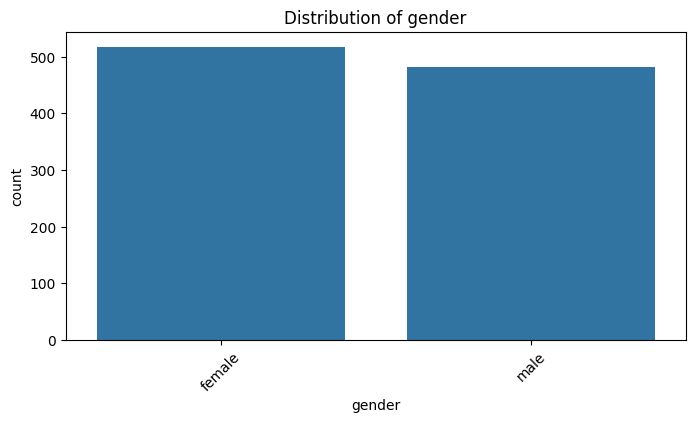

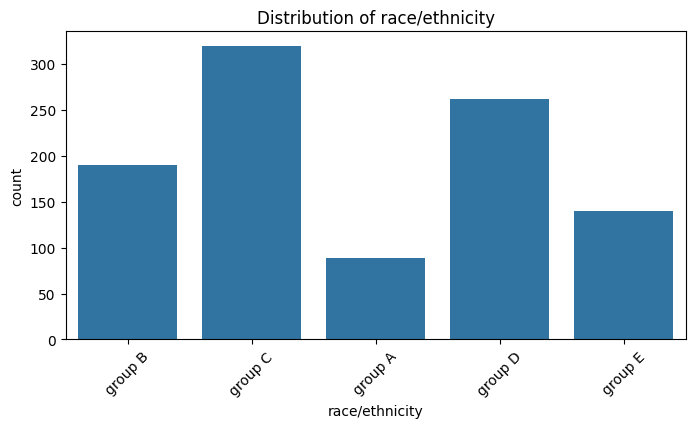

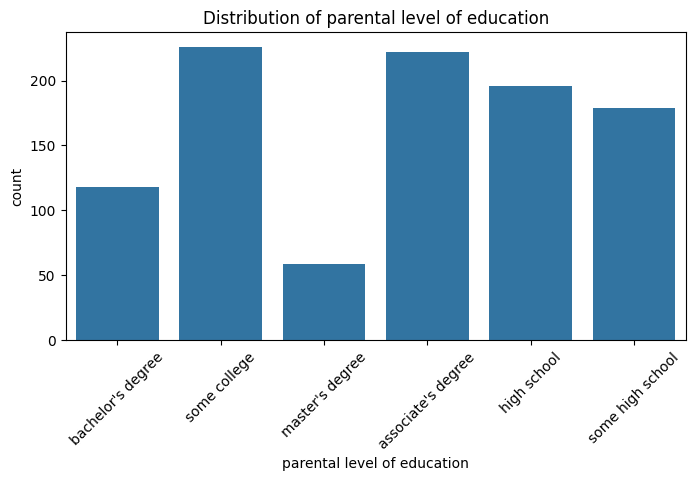

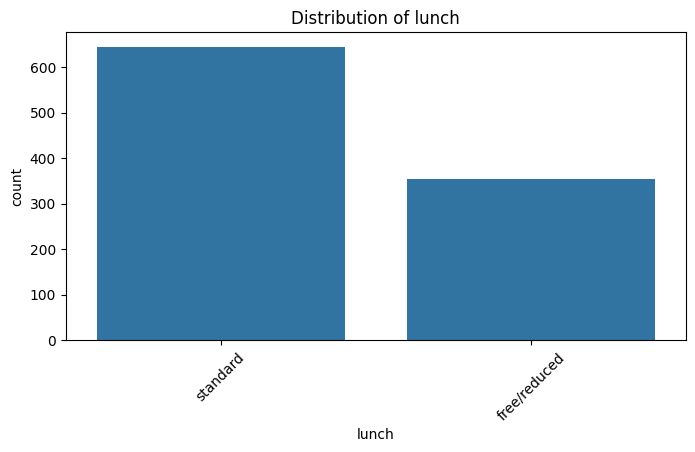

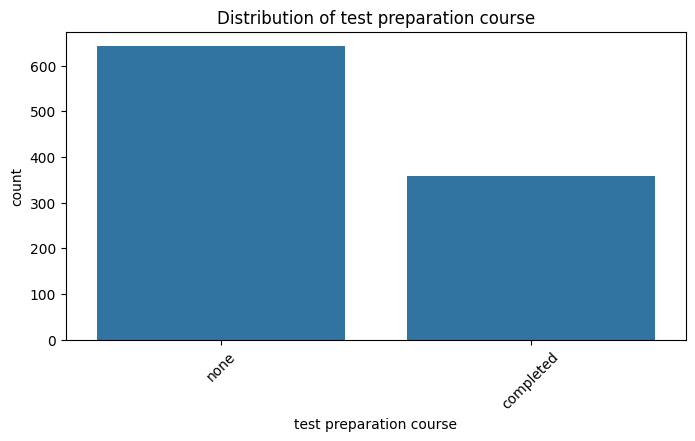

In [28]:
# Categorical feature distributions
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

**5.2 Numerical Feature Distributions**

We use histograms and kernel density plots (KDE) for math, reading, and writing scores.

Insights:

- The scores are somewhat normally distributed but slightly skewed.

- Math scores have more students clustered around 60–80.

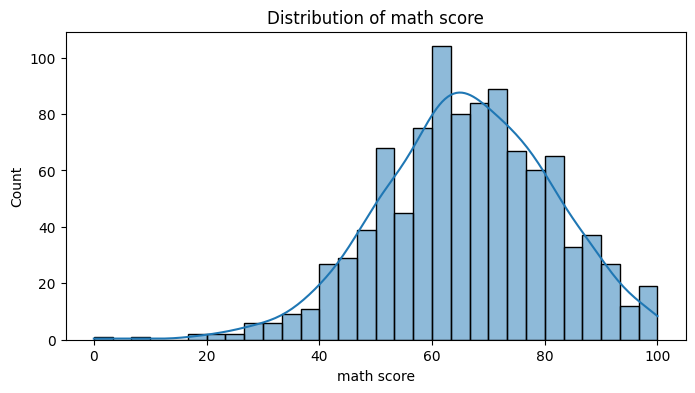

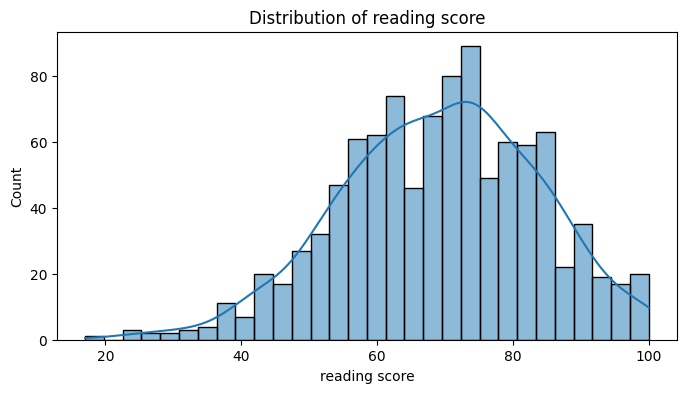

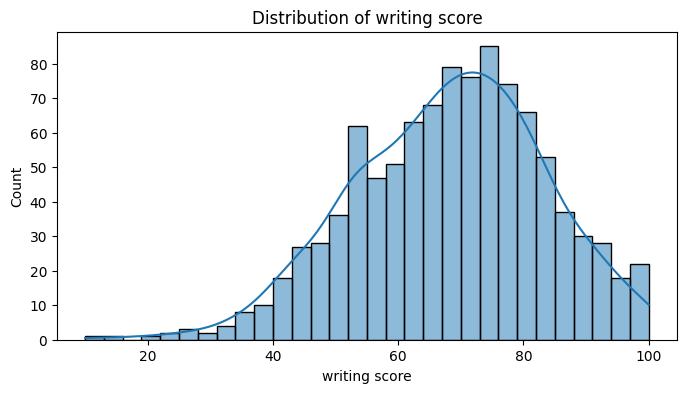

In [29]:
# Numerical feature distributions
numerical_cols = ['math score', 'reading score', 'writing score']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

**5.3 Correlation Heatmap**

We plot a heatmap to observe correlations between math, reading, and writing scores.

Insights:

- Reading and writing scores are highly correlated (close to 0.95).

- Math scores also show positive correlation with reading and writing.

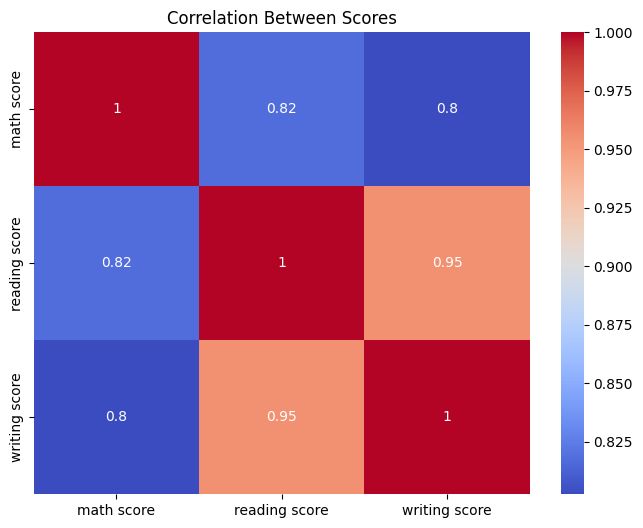

In [30]:
# Correlation heatmap between scores
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores')
plt.show()

## 6. Additional Exploratory Visualizations

**6.1 Scatter Plots**

We visualize relationships between:

- Math vs Reading Scores

- Math vs Writing Scores

- Reading vs Writing Scores

Insights:

- Strong linear trends indicate higher reading and writing scores relate to higher math scores.

- Very strong correlation between reading and writing.

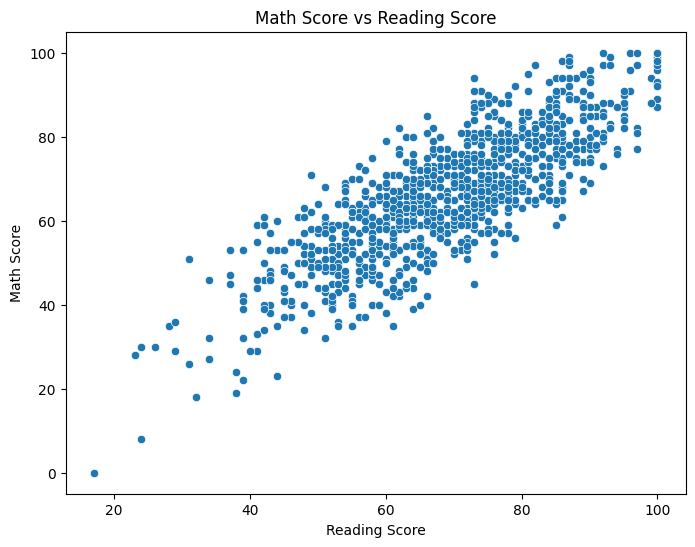

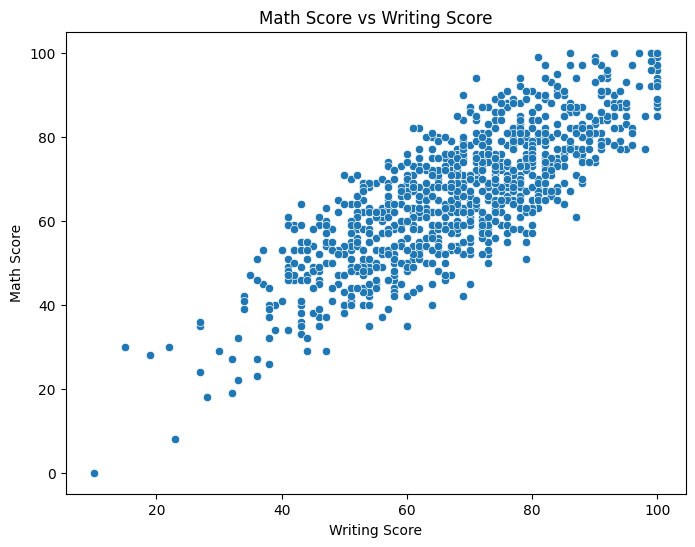

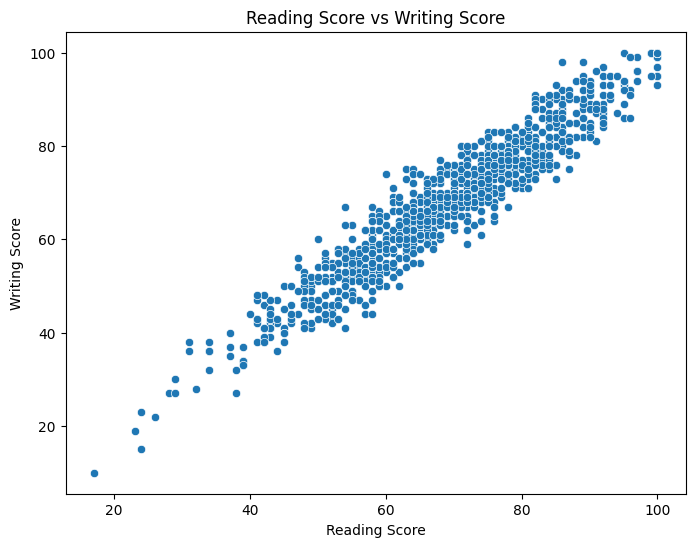

In [31]:
# Scatter Plot: Math Score vs Reading Score
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['reading score'], y=df['math score'])
plt.title('Math Score vs Reading Score')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.show()

# Scatter Plot: Math Score vs Writing Score
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['writing score'], y=df['math score'])
plt.title('Math Score vs Writing Score')
plt.xlabel('Writing Score')
plt.ylabel('Math Score')
plt.show()

# Scatter Plot: Reading Score vs Writing Score
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['reading score'], y=df['writing score'])
plt.title('Reading Score vs Writing Score')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

**6.2 Pairplot**

A pairplot visualizes all pairwise relationships between math, reading, and writing scores.

Insights:

- Further confirms strong positive relationships.

- Distributions are generally symmetric.

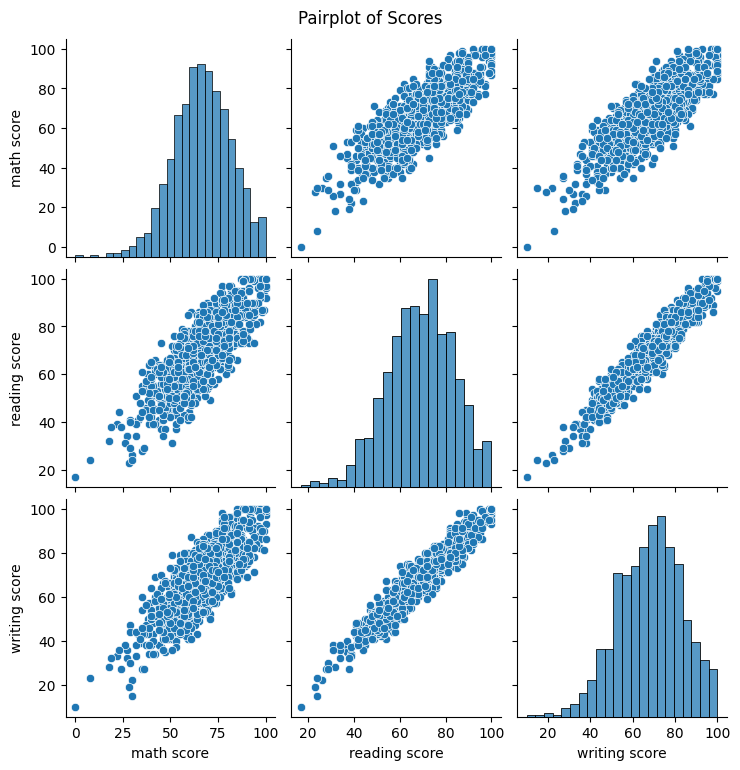

In [32]:
# Pairplot for all scores
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle('Pairplot of Scores', y=1.02)
plt.show()

**6.3 Swarmplots**

We use swarmplots to explore how:

- Race/Ethnicity affects math scores.

- Lunch Type affects math scores.

Insights:

- Students with standard lunch generally perform better.

- There is variance across different ethnic groups.

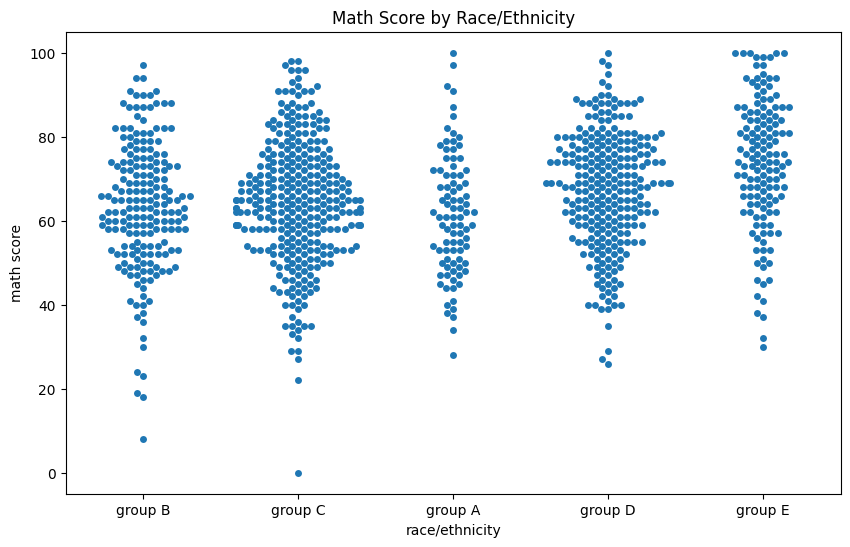

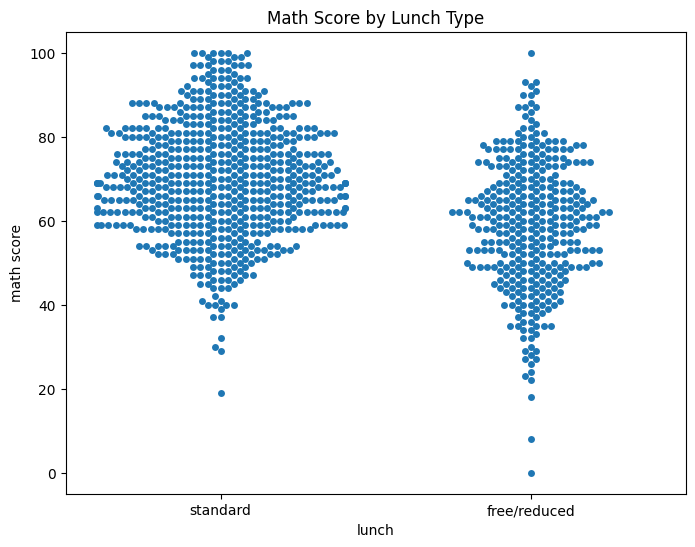

In [33]:
# Swarmplot: Math Score by Race/Ethnicity
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, x='race/ethnicity', y='math score')
plt.title('Math Score by Race/Ethnicity')
plt.show()

# Swarmplot: Math Score by Lunch
plt.figure(figsize=(8,6))
sns.swarmplot(data=df, x='lunch', y='math score')
plt.title('Math Score by Lunch Type')
plt.show()

**6.4 Gender Pie Chart**

We plot a pie chart showing gender distribution.

Insights:

- Slightly more females than males in the dataset.

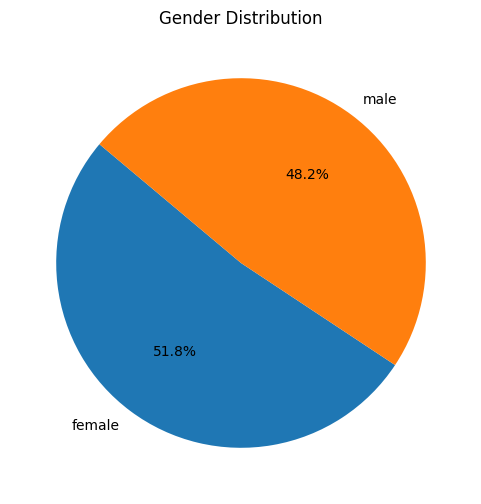

In [34]:
# Pie chart for Gender distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

**6.5 Boxplot of Math Score by Gender**

We create a boxplot comparing math scores between males and females.

Insights:

- Male students tend to score slightly higher in math.

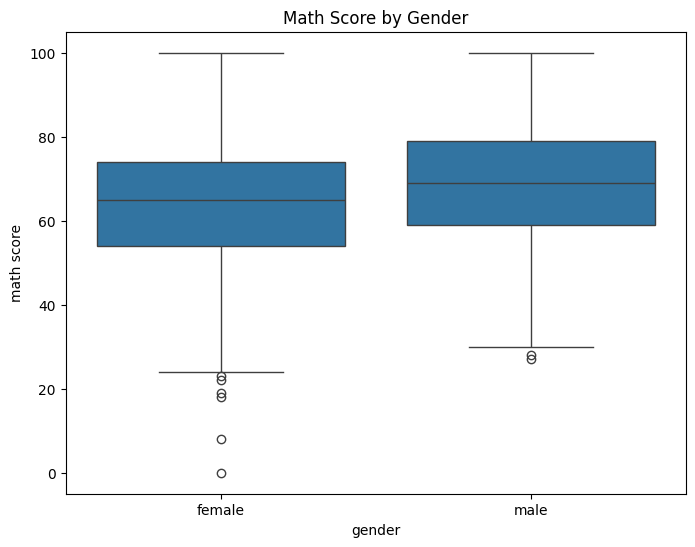

In [35]:
# Boxplot of math score by gender
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='gender', y='math score')
plt.title('Math Score by Gender')
plt.show()

**6.6 Violin Plot of Math Score by Test Preparation**

We create a violin plot to show the distribution of math scores based on test preparation course completion.

Insights:

- Students who completed the preparation course generally have higher math scores.

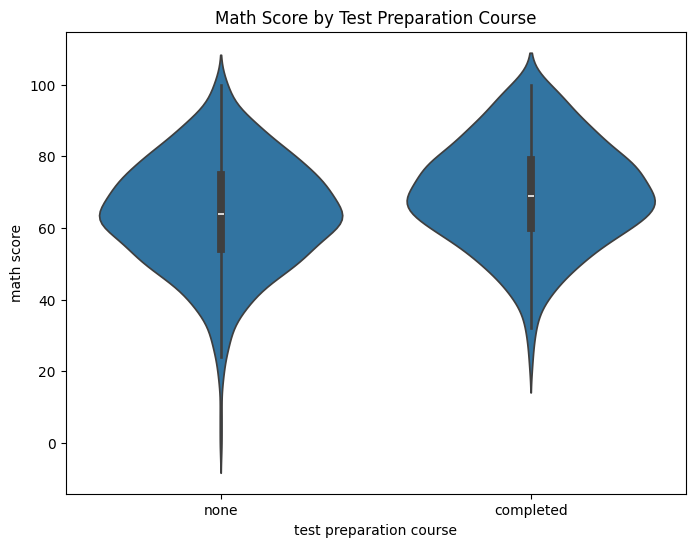

In [36]:
# Violin plot of math score by test preparation course
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='test preparation course', y='math score')
plt.title('Math Score by Test Preparation Course')
plt.show()

## 7. Preprocessing

Before training models, we need to convert categorical data to numeric:

- We use Label Encoding to assign numbers to each category.

Reason:
Machine learning models cannot directly handle text data.

In [37]:
# -----------------------------
# 7. Preprocessing: Encoding Categorical Variables
# -----------------------------
features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
target = 'math score'

X = df[features]
y = df[target]

# Encode categorical features
label_encoders = {}
for col in features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save encoders

C:\Users\Arnav\AppData\Local\Temp\ipykernel_16800\2879168681.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\Arnav\AppData\Local\Temp\ipykernel_16800\2879168681.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\Arnav\AppData\Local\Temp\ipykernel_16800\2879168681.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


## 8. Train-Test Split

We split the data into:

- 80% training set (used to train the models)

- 20% testing set (used to evaluate model performance)

Reason:
Splitting prevents overfitting and ensures fair evaluation.

In [38]:
# -----------------------------
# 8. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 9. Model Training

We train two different models:

- Linear Regression: Assumes a straight-line relationship between features and the target.

- Decision Tree Regressor: A non-linear model that creates decision rules based on feature values.

Reason for two models:
Compare a simple vs. complex model.



In [39]:
# -----------------------------
# 9. Model Training
# -----------------------------

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## 10. Predictions

After training, we use the models to predict math scores on the test set.

This allows us to measure model performance objectively.

In [40]:
# -----------------------------
# 10. Predictions
# -----------------------------
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

## 11. Model Evaluation

Evaluation Metrics

We use two evaluation metrics:

- Root Mean Squared Error (RMSE): Lower values are better.

- R² Score: Closer to 1.0 is better.

Formulas:

- RMSE = √(mean((actual - predicted)²))

- R² = 1 - (sum of squared residuals / total sum of squares)

In [41]:
# -----------------------------
# 11. Evaluation
# -----------------------------

# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print Results
print("\nLinear Regression Results:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}\n")

print("Decision Tree Regressor Results:")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")



Linear Regression Results:
RMSE: 14.24
R² Score: 0.17

Decision Tree Regressor Results:
RMSE: 16.36
R² Score: -0.10


## 12. Model Results Visualizations

**12.1 Actual vs Predicted Plots**

Scatter plots comparing actual vs predicted math scores for both models.

Insights:

- Points closer to the red dashed line = better predictions.

- Linear Regression shows smoother prediction patterns.



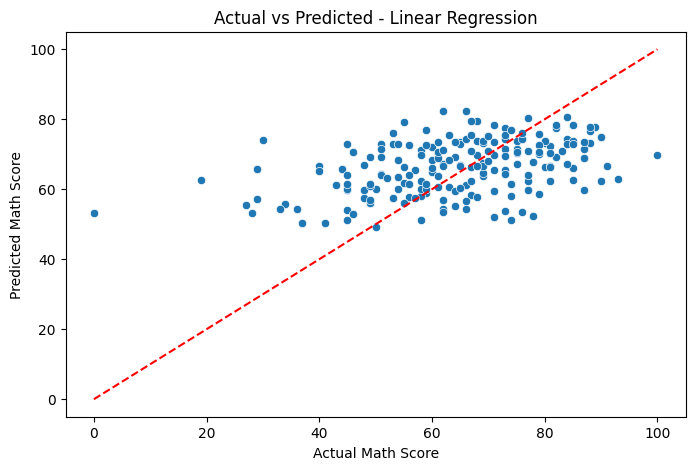

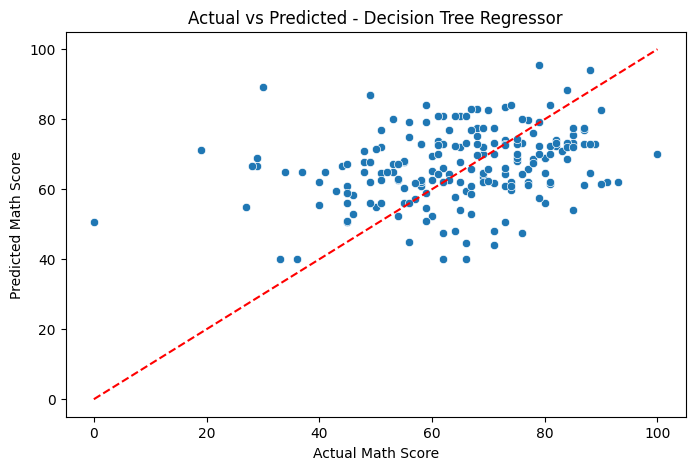

In [42]:
# -----------------------------
# 12. Model Results Visualizations
# -----------------------------

# Actual vs Predicted - Linear Regression
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.title('Actual vs Predicted - Linear Regression')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.plot([0, 100], [0, 100], 'r--')
plt.show()

# Actual vs Predicted - Decision Tree
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.title('Actual vs Predicted - Decision Tree Regressor')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.plot([0, 100], [0, 100], 'r--')
plt.show()

**12.2 Residuals Distributions**

Histogram plots of residuals (prediction errors) for both models.

Insights:

- Residuals for Linear Regression are more symmetrically distributed.

- Decision Tree residuals show some spikes, indicating overfitting to specific ranges.

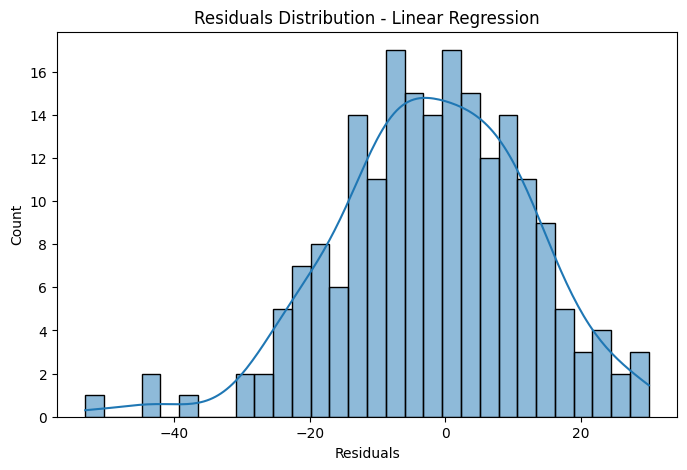

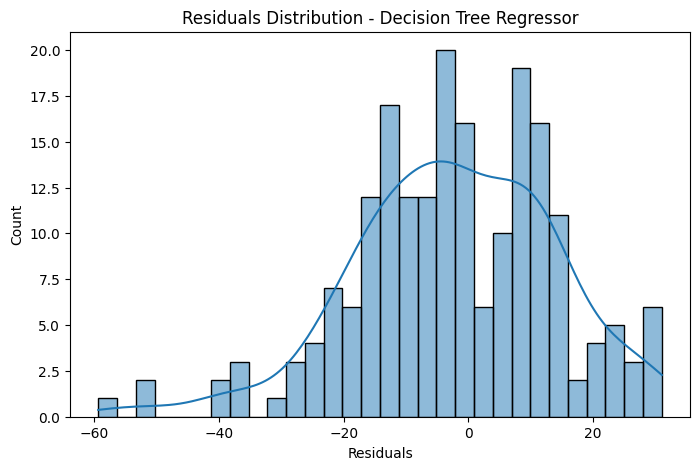

In [43]:
# Residuals Distribution - Linear Regression
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(8,5))
sns.histplot(residuals_lr, bins=30, kde=True)
plt.title('Residuals Distribution - Linear Regression')
plt.xlabel('Residuals')
plt.show()

# Residuals Distribution - Decision Tree
residuals_dt = y_test - y_pred_dt
plt.figure(figsize=(8,5))
sns.histplot(residuals_dt, bins=30, kde=True)
plt.title('Residuals Distribution - Decision Tree Regressor')
plt.xlabel('Residuals')
plt.show()

**12.3 RMSE and R² Comparison Bar Charts**

Side-by-side bar charts comparing RMSE and R² scores.

Insights:

- Helps visualize which model performs better.

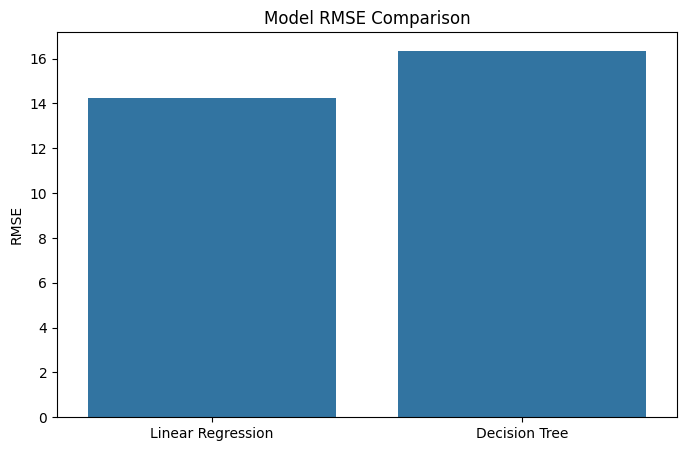

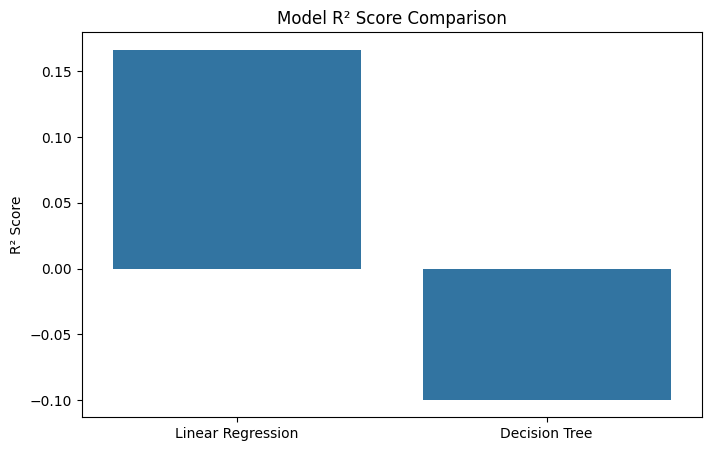

In [44]:
# RMSE Comparison
models = ['Linear Regression', 'Decision Tree']
rmse_values = [rmse_lr, rmse_dt]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=rmse_values)
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.show()

# R² Score Comparison
r2_values = [r2_lr, r2_dt]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=r2_values)
plt.title('Model R² Score Comparison')
plt.ylabel('R² Score')
plt.show()


## Conclusion
Linear Regression provided reasonable performance with interpretable results.

Decision Tree Regressor fit the training data closely but may overfit on unseen data.

Final Takeaway:
Simple models like Linear Regression can often perform comparably or even better than more complex models, especially with limited feature sets.